In [24]:
# import required libraries
import os
import sys
### add system path to get other library directories
sys.path[0] = os.path.join(os.path.abspath(''),'..')

import geopandas
import warnings
import pandas as pd
import math
import statistics
import matplotlib.pyplot as plt
import contextily as cx
import zipfile
import seaborn as sns
import numpy as np
import glob
warnings.filterwarnings('ignore')

In [25]:
## if file doesn't exist then unzip
if os.path.exists("/tmp/data/standard_dataframes/standard_acs_censustract_df_2021.geojson"):
    ACS_2021_MERGED_FILE = "/tmp/data/standard_dataframes/standard_acs_censustract_df_2021.geojson"
else:
    with zipfile.ZipFile('/tmp/data/standard_dataframes/standard_acs_censustract_df_2021.zip', 'r') as zip_ref:
        zip_ref.extractall('/tmp/data/standard_dataframes/')
    ACS_2021_MERGED_FILE = "/tmp/data/standard_dataframes/standard_acs_censustract_df_2021.geojson"
    
if os.path.exists("/tmp/data/standard_dataframes/standard_acs_censustract_df_2017.geojson"):
    ACS_2017_MERGED_FILE = "/tmp/data/standard_dataframes/standard_acs_censustract_df_2017.geojson"
else:
    with zipfile.ZipFile('/tmp/data/standard_dataframes/standard_acs_censustract_df_2017.zip', 'r') as zip_ref:
        zip_ref.extractall('/tmp/data/standard_dataframes/')
    ACS_2017_MERGED_FILE = "/tmp/data/standard_dataframes/standard_acs_censustract_df_2017.geojson"

In [26]:
# read in the files
acs_2017_standard_df = geopandas.read_file(ACS_2017_MERGED_FILE)
acs_2021_standard_df = geopandas.read_file(ACS_2021_MERGED_FILE)

In [ ]:
acs_2017_standard_df[acs_2017_standard_df['City'] == 'chicago']

In [8]:
num = acs_2017_standard_df._get_numeric_data()
num[num < 0] = pd.NA

In [27]:
count = 0
for index, i in enumerate(acs_2017_standard_df["Est_Median household income in the past 12 months (in 2020 inflation-adjusted dollars) MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS)_tct17"].isna()):
    if i:
        print(index)
        count += 1

111
161
181
252
309
310
311
312
779
780
911
912
913
1106
1107
1108
1109
1138
1178
1179
1180
1181
1182
1183
1184
1185
1186
1187
1188
1220
1221
1223
1233
1234
1235
1247
1248
1249
1508
1509
1883
1884
1885
2291
2334
2335
2463
2974
2975
3321
3747
3748
3784
3785
3786
3787
3788
3803
3804
3805
4408
4527
4720
4721
4722
4739
4740
4741
4742
4743
4744
4745
5225
5226
5227
5228
5333
5334
5335
5336
5337
5338
5349
5459
5460
5639
5640
5641
5642
5643
5644
5739
5819
5983
6309
6310
6585
6586
6711
6712
8179
8187
8224
8987
8988
8989
8990
8991
8992
9259
9260
9261
9262
9266
9267
9268
9269
9360
9361
9362
9363
9364
9365
9366
9367
9368
9369
9370
9371
9372
9432
9433
9524
9525
9526
9527
9528
9529
9530
9548
9549
9992
9993
9994
9995
9996
10370
10371
10372
10373
10406
10407
10408
10415
10416
10417
10418
10419
10487
10488
10489
10490
10491
10492
10493
10494
10524
10525
10649
10650
11042
11656
11659
11660
11708
11709
11778
11932
11933
11934
11942
11950
11996
11997
12051
12115
12116
12224
12225
12226
12227
12228
12689
1

15839
15840
15841
15842
15843
15844
15845
15846
15847
15848
15849
15850
15851
15852
15853
15854
15855
15856
15857
15858
15859
15860
15861
15862
15863
15864
15865
15866
15867
15868
15869
15870
15871
15872
15873
15874
15875
15876
15877
15878
15879
15880
15881
15882
15883
15884
15885
15886
15887
15888
15889
15890
15891
15892
15893
15894
15895
15896
15897
15898
15899
15900
15901
15902
15903
15904
15905
15906
15907
15908
15909
15910
15911
15912
15913
15914
15915
15916
15917
15918
15919
15920
15921
15922
15923
15924
15925
15926
15927
15928
15929
15930
15931
15932
15933
15934
15935
15936
15937
15938
15939
15940
15941
15942
15943
15944
15945
15946
15947
15948
15949
15950
15951
15952
15953
15954
15955
15956
15957
15958
15959
15960
15961
15962
15963
15964
15965
15966
15967
15968
15969
15970
15971
15972
15973
15974
15975
15976
15977
15978
15979
15980
15981
15982
15983
15984
15985
15986
15987
15988
15989
15990
15991
15992
15993
15994
15995
15996
15997
15998
15999
16000
16001
16002
16003
16004
1600

In [28]:
count

2455

In [23]:
acs_2017_standard_df

,City,tract,state,county,GEOID,Est_Total: TOTAL POPULATION_tct17,Est_Total: SEX BY AGE_tct17,Est_Total: Male: SEX BY AGE_tct17,Est_Total: Male: Under 5 years SEX BY AGE_tct17,Est_Total: Male: 5 to 9 years SEX BY AGE_tct17,...,"PERC Est_Total: Some college, 1 or more years, no degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17",PERC Est_Total: Associate's degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,PERC Est_Total: Bachelor's degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,PERC Est_Total: Master's degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,PERC Est_Total: Professional school degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,PERC Est_Total: Doctorate degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,Neighborhood,% of Tract within Neighborhood,Correct tract and county?,geometry
0,arlington,121609,48,439,48439121609,5430.0,5430.0,2785.0,136.0,122.0,...,0.128928,0.036160,0.343142,0.141147,0.053367,0.044638,None,None,1,"POLYGON ((-97.23369 32.67175, -97.23366 32.671..."
1,arlington,111522,48,439,48439111522,7945.0,7945.0,3984.0,417.0,436.0,...,0.121638,0.065991,0.077369,0.030616,0.003310,0.000000,None,None,1,"POLYGON ((-97.09783 32.69184, -97.09780 32.692..."
2,arlington,113109,48,439,48439113109,4142.0,4142.0,2149.0,257.0,35.0,...,0.207586,0.078966,0.234138,0.097931,0.012759,0.038276,None,None,1,"POLYGON ((-97.08537 32.76228, -97.08534 32.763..."
3,arlington,111516,48,439,48439111516,7107.0,7107.0,3596.0,123.0,240.0,...,0.209685,0.071088,0.209685,0.039361,0.005964,0.005010,None,None,1,"POLYGON ((-97.13506 32.67527, -97.13473 32.675..."
4,arlington,111505,48,439,48439111505,4321.0,4321.0,1935.0,136.0,118.0,...,0.218530,0.067808,0.245384,0.086606,0.014770,0.026855,None,None,1,"POLYGON ((-97.16940 32.73156, -97.16938 32.731..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20767,wichita,3900,20,173,20173003900,4038.0,4038.0,2242.0,201.0,315.0,...,0.124049,0.071537,0.068493,0.016743,0.003805,0.000000,None,None,1,"POLYGON ((-97.33158 37.65804, -97.33157 37.658..."
20768,wichita,4000,20,173,20173004000,4451.0,4451.0,2308.0,167.0,232.0,...,0.168756,0.068113,0.060319,0.019993,0.000000,0.000000,None,None,1,"POLYGON ((-97.34876 37.65702, -97.34793 37.660..."
20769,wichita,4300,20,173,20173004300,3848.0,3848.0,2483.0,0.0,8.0,...,0.184557,0.064751,0.125000,0.052632,0.049861,0.000000,None,None,1,"POLYGON ((-97.35439 37.69569, -97.35435 37.695..."
20770,wichita,5100,20,173,20173005100,5014.0,5014.0,2662.0,187.0,224.0,...,0.128446,0.076038,0.103302,0.006059,0.000000,0.000000,None,None,1,"POLYGON ((-97.35279 37.66602, -97.35152 37.666..."


In [31]:
def checking_ids(standard_df):
    checking_ids = {
        "chicago": {"state": 17, "county": [31, 43]}
    }

    id_check = []

    for index, row in standard_df.iterrows():
        curr_city = row['City']
        if (row['state'] == checking_ids[curr_city]['state']) & (row['county'] in checking_ids[curr_city]['county']):
            id_check.append(1)
        else:
            id_check.append(0)

    standard_df['Correct tract and county?'] = id_check
    return standard_df


chicago_df = acs_2017_standard_df[acs_2017_standard_df['City'] == 'chicago']
chicago_df = checking_ids(chicago_df)

In [32]:
chicago_df

,City,tract,state,county,GEOID,Est_Total: TOTAL POPULATION_tct17,Est_Total: SEX BY AGE_tct17,Est_Total: Male: SEX BY AGE_tct17,Est_Total: Male: Under 5 years SEX BY AGE_tct17,Est_Total: Male: 5 to 9 years SEX BY AGE_tct17,...,"PERC Est_Total: Some college, 1 or more years, no degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17",PERC Est_Total: Associate's degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,PERC Est_Total: Bachelor's degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,PERC Est_Total: Master's degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,PERC Est_Total: Professional school degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,PERC Est_Total: Doctorate degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,Neighborhood,% of Tract within Neighborhood,geometry,Correct tract and county?
1431,chicago,30101,17,31,17031030101,3549.0,3549.0,1877.0,61.0,100.0,...,0.146675,0.049952,0.369710,0.132676,0.027681,0.024181,Edgewater,0.5383468352095097,"POLYGON ((-87.66034 41.99229, -87.66011 41.992...",1
1432,chicago,30701,17,31,17031030701,1597.0,1597.0,901.0,28.0,3.0,...,0.158048,0.080845,0.273125,0.081573,0.026220,0.032775,Edgewater,1,"POLYGON ((-87.66007 41.98362, -87.65984 41.983...",1
1433,chicago,70103,17,31,17031070103,1587.0,1587.0,662.0,26.0,0.0,...,0.081340,0.038278,0.470813,0.280383,0.046890,0.035407,Lincoln Park,0.9999999999999998,"POLYGON ((-87.64422 41.92805, -87.64381 41.928...",1
1434,chicago,807900,17,31,17031807900,4148.0,4148.0,2085.0,134.0,168.0,...,0.111398,0.038747,0.327091,0.117533,0.106555,0.023248,"Sauganash,Forest Glen",2.075624738497713e-05,"POLYGON ((-87.76220 42.00188, -87.76201 42.002...",1
1435,chicago,808001,17,31,17031808001,3675.0,3675.0,1809.0,83.0,99.0,...,0.131815,0.057132,0.309933,0.126960,0.059746,0.022778,"Sauganash,Forest Glen",5.159963471439007e-05,"POLYGON ((-87.74426 42.01536, -87.74402 42.015...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3288,chicago,100500,17,31,17031100500,5492.0,5492.0,2561.0,69.0,160.0,...,0.165679,0.091729,0.264107,0.118784,0.015460,0.018552,O'Hare,1.639778026544191e-05,"POLYGON ((-87.83663 41.97532, -87.83662 41.975...",1
3289,chicago,100500,17,31,17031100500,5492.0,5492.0,2561.0,69.0,160.0,...,0.165679,0.091729,0.264107,0.118784,0.015460,0.018552,Norwood Park,0.9920874759833141,"POLYGON ((-87.83663 41.97532, -87.83662 41.975...",1
3290,chicago,710300,17,31,17031710300,1444.0,1444.0,657.0,58.0,63.0,...,0.358176,0.077864,0.081201,0.048943,0.000000,0.000000,Auburn Gresham,0.9999999999999992,"POLYGON ((-87.66361 41.75768, -87.66330 41.757...",1
3291,chicago,840801,17,43,17043840801,2290.0,2290.0,1080.0,57.0,50.0,...,0.094798,0.043353,0.126590,0.038150,0.015029,0.000000,O'Hare,0.06570944539597241,"POLYGON ((-87.94393 41.95006, -87.94253 41.950...",1


In [1]:
import os
import sys
### add system path to get other library directories
sys.path[0] = os.path.join(os.path.abspath(''),'..')

import geopandas
import warnings
import pandas as pd
import math
import statistics
import matplotlib.pyplot as plt
import contextily as cx
import zipfile
import glob
import json
warnings.filterwarnings('ignore')

In [5]:
tiger_data = geopandas.read_file("/tmp/data/TIGER-census-data/2017/massachusetts/massachusetts.shp")

In [6]:
tiger_data['']

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,25,027,724100,25027724100,7241,Census Tract 7241,G5020,S,53034202,1639215,+42.2566908,-072.1581690,"POLYGON ((-72.21782 42.27018, -72.21765 42.270..."
1,25,027,759100,25027759100,7591,Census Tract 7591,G5020,S,25570219,1427831,+42.2096822,-072.0401777,"POLYGON ((-72.07888 42.21475, -72.07880 42.214..."
2,25,025,091300,25025091300,913,Census Tract 913,G5020,S,262560,0,+42.3199357,-071.0668701,"POLYGON ((-71.07220 42.32136, -71.07174 42.321..."
3,25,025,110501,25025110501,1105.01,Census Tract 1105.01,G5020,S,647837,0,+42.2821618,-071.1414485,"POLYGON ((-71.14777 42.28599, -71.14739 42.286..."
4,25,025,030500,25025030500,305,Census Tract 305,G5020,S,193673,292691,+42.3675851,-071.0516956,"POLYGON ((-71.05979 42.36877, -71.05883 42.369..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1473,25,005,611202,25005611202,6112.02,Census Tract 6112.02,G5020,S,16516218,2043930,+41.9766863,-071.2225924,"POLYGON ((-71.25929 41.97422, -71.24939 41.977..."
1474,25,005,611102,25005611102,6111.02,Census Tract 6111.02,G5020,S,17393046,622677,+41.9560057,-071.1786674,"POLYGON ((-71.21047 41.95602, -71.20995 41.956..."
1475,25,005,653204,25005653204,6532.04,Census Tract 6532.04,G5020,S,12475485,58547,+41.6031693,-070.9874491,"POLYGON ((-71.00314 41.60654, -71.00313 41.606..."
1476,25,005,613902,25005613902,6139.02,Census Tract 6139.02,G5020,S,8045313,247846,+41.8727942,-071.1136635,"POLYGON ((-71.13486 41.88566, -71.13469 41.885..."


In [116]:
import os
import sys
### add system path to get other library directories
sys.path[0] = os.path.join(os.path.abspath(''),'..')

import geopandas
import warnings
import pandas as pd
import math
import statistics
import matplotlib.pyplot as plt
import contextily as cx
import zipfile
import glob
import json
warnings.filterwarnings('ignore')

## This good city list are the cities that we want to complete the merge on

GOOD_CITY_LIST = ['arlington', 'atlanta','austin', 'bakersfield', 'boston', 'chicago', 'dallas', 'denver', 'detroit', 'el-paso', 'fort-worth', 'fresno', 'houston', 'indianapolis', 'kansas-city', 'los-angeles', 'louisville', 'memphis', 'mesa', 'minneapolis', 'new-york-city', 'oklahoma-city', 'omaha', 'philadelphia', 'phoenix', 'portland', 'sacramento', 'san-antonio', 'san-diego', 'san-jose', 'seattle', 'tulsa', 'tuscon', 'washington-dc', 'wichita']

GOOD_CITY_SHAPEFILE_LOCATIONS = {
    "arlington": {"location" : "/tmp/data/boundary-shapefiles/city-boundaries/arlington/arlington-boundaries/arlington-boundaries.shp", "state": "texas"},
    "atlanta": {"location" : "/tmp/data/boundary-shapefiles/city-boundaries/atlanta/atlanta-boundaries/atlanta-boundaries.shp", "state": "georgia"},
"austin": {"location" : "/tmp/data/boundary-shapefiles/city-boundaries/austin/austin-boundaries/austin.shp", "state": "texas"},
"bakersfield": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/bakersfield/bakersfield-boundaries/bakersfield-boundaries.shp", "state": "california"},
    "baltimore": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/baltimore/baltimore-boundaries/tl_2019_24510_faces.shp", "state": "maryland"},
    "boston": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/boston/boston-boundaries/City_of_Boston_Boundary.shp", "state": "massachusetts"},
    "chicago": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/chicago/chicago-boundaries/chicago_boundaries.shp", "state": "illinois"},
    "dallas": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/dallas/dallas-boundaries/dallas.shp", "state": "texas"},
    "denver": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/denver/denver-boundaries/county_boundary.shp", "state": "colorado"},
    "detroit": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/detroit/detroit-boundaries/City_of_Detroit_Boundary.shp", "state": "michigan"},
    "el-paso": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/el-paso/el-paso-boundaries/el_paso.shp", "state": "texas"},
    "fort-worth": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/fort-worth/fort-worth-boundaries/fort-worth-boundaries.shp", "state": "texas"},
"fresno": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/fresno/fresno-boundaries/fresno-boundaries.shp", "state": "california"},
    "houston": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/houston/houston-boundaries/houston.shp", "state": "texas"},
    "indianapolis": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/indianapolis/indianapolis-boundaries/Cities_and_Towns.shp", "state": "indiana"},
    "kansas-city": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/kansas-city/kansas-city-boundaries/kansas-city-boundaries.shp", "state": "missouri"},
    "los-angeles": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/los-angeles/los-angeles-boundaries/los-angeles-boundaries.shp", "state": "california"},
    "louisville": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/louisville/louisville boundaries/louisville_boundaries.shp", "state": "kentucky"},
    "memphis": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/memphis/memphis-boundaries/geo_export_8955b821-8b16-46ef-98ec-8ffbe9f68861.shp", "state": "tennessee"},
    "mesa": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/mesa/mesa-boundaries/mesa-boundaries.shp", "state": "arizona"},
    "minneapolis": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/minneapolis/minneapolis-boundaries/minneapolis-boundaries.shp", "state": "minnesota"},
    "new-york-city": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/new-york-city/nyc borough boundaries/nyc borough boundaries.shp", "state": "new-york"},
    "oklahoma-city": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/oklahoma-city/oklahoma-city-boundaries/oklahoma-city-boundaries.shp", "state": "oklahoma"},
    "omaha": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/omaha/omaha-boundaries/omaha-boundaries.shp", "state": "nebraska"},
    "philadelphia": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/philadelphia/philadelphia-boundaries/City_Limits.shp", "state": "pennsylvania"},
    "phoenix": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/phoenix/phoenix boundaries/phoenix boundaries.shp", "state": "arizona"},
    "portland": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/portland/portland-boundaries/portland-boundaries.shp", "state": "oregon"},
    "sacramento": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/sacramento/sacramento-boundaries/sacramento-boundaries.shp", "state": "california"},
    "san-antonio": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/san-antonio/san-antonio-boundaries/san_antonio.shp", "state": "texas"},
    "san-diego": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/san-diego/san-diego-boundaries/san-diego-boundaries.shp", "state": "california"},
    "san-jose": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/san-jose/san-jose-boundaries/san-jose-boundaries.shp", "state": "california"},
    "seattle": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/seattle/seattle-boundaries/seattle-boundaries-v3.shp", "state": "washington"},
    "tulsa": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/tulsa/tulsa-boundaries/tulsa-boundaries.shp", "state": "oklahoma"},
    "tuscon": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/tuscon/tuscon-boundaries/tuscon-boundaries.shp", "state": "arizona"},
    "washington-dc": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/washington-dc/washington-dc-boundaries/washington-dc-boundaries.shp", "state": "dc"},
    "wichita": { "location" : "/tmp/data/boundary-shapefiles/city-boundaries/wichita/wichita-boundaries/wichita-boundaries.shp", "state": "kansas"}
}


# These city neighborhood shapefiles allow us to merge with the neighborhood boundary data
GOOD_CITY_NHOOD_SHAPEFILE_LOCATIONS = {
    "seattle": { "location" : "/tmp/data/boundary-shapefiles/neighborhood-boundaries/seattle/seattle_ccn/City_Clerk_Neighborhoods.shp", "nhood_col" : 'HOODS_'},
    "denver": {"location": "/tmp/data/boundary-shapefiles/neighborhood-boundaries/denver/denver_1.0.32/statistical_neighborhoods.shp", "nhood_col": "NBHD_NAME"},
    "washington-dc": {"location": "/tmp/data/boundary-shapefiles/neighborhood-boundaries/washington-dc/DC_shapefile/Neighborhood_Clusters.shp", "nhood_col": "NAME"},
    "boston": {"location": "/tmp/data/boundary-shapefiles/neighborhood-boundaries/boston/Boston_Neighborhoods/Boston_Neighborhoods.shp", "nhood_col": "Name"},
     "portland": {"location": "/tmp/data/boundary-shapefiles/neighborhood-boundaries/portland/portland-neighborhood-boundaries/Neighborhood_Boundaries.shp", "nhood_col": "ID"},
    "houston": {"location": "/tmp/data/boundary-shapefiles/neighborhood-boundaries/houston/Houston/Houston.shp", "nhood_col": "SNBNAME"},
    "indianapolis": { "location": "/tmp/data/boundary-shapefiles/neighborhood-boundaries/indianapolis/Indy_Neighborhoods/Indy_Neighborhoods.shp", "nhood_col": "NAME"},
    "los-angeles": {"location": "/tmp/data/boundary-shapefiles/neighborhood-boundaries/los-angeles/Los Angeles/Los Angeles.shp", "nhood_col": "display_na"},
    "phoenix": {"location": "/tmp/data/boundary-shapefiles/neighborhood-boundaries/phoenix/phoenix/Villages.shp", "nhood_col": "NAME"},
    "san-francisco": { "location": "/tmp/data/boundary-shapefiles/neighborhood-boundaries/san-francisco/SF Find Neighborhoods/geo_export_f62da660-837f-478c-9ba4-ceb40e9ed8eb.shp", "nhood_col": "name"},
    "austin": {"location": "/tmp/data/boundary-shapefiles/neighborhood-boundaries/austin/Neighborhoods/geo_export_81d98617-c469-49e1-9bf6-3ef25c07d0c6.shp", "nhood_col": "neighname"},
    "dallas": { "location": "/tmp/data/boundary-shapefiles/neighborhood-boundaries/dallas/Councils/Councils.shp", "nhood_col": "COUNCIL"},
    "san-jose": { "location": "/tmp/data/boundary-shapefiles/neighborhood-boundaries/san-jose/Zip_Code_Boundary/Zip_Code_Boundary.shp","nhood_col": "ZIPCODE"},
    "san-diego": {"location": "/tmp/data/boundary-shapefiles/neighborhood-boundaries/san-diego/CommunityPlanningAreas/cmty_plan_datasd.shp","nhood_col": "cpname"},
    "baltimore": {"location": "/tmp/data/boundary-shapefiles/neighborhood-boundaries/baltimore/neighborhoods/baltimore.shp","nhood_col": "Name"},
    "detroit": {"location": "/tmp/data/boundary-shapefiles/neighborhood-boundaries/detroit/neighborhoods/detroit.shp", "nhood_col": "name"},
    "louisville": {"location": "/tmp/data/boundary-shapefiles/neighborhood-boundaries/louisville/neighborhoods/louisville.shp", "nhood_col": "NH_NAME"},
    "new-york-city": {"location": "/tmp/data/boundary-shapefiles/neighborhood-boundaries/new-york-city/nycd_22a/nycd.shp", "nhood_col": "BoroCD"},
    "chicago": {"location": "/tmp/data/boundary-shapefiles/neighborhood-boundaries/chicago/neighborhoods/geo_export_24517513-d42b-43b9-a525-49bfe729d213.shp", "nhood_col": "pri_neigh" }
    }

# Read in the ACS columns of interest
FILE_2021 = open("/tmp/data/acs_data/2021_columns.json", "r")
COL_2021 = list(json.load(FILE_2021).values())
FILE_2017 = open("/tmp/data/acs_data/2017_columns.json", "r")
COL_2017 = list(json.load(FILE_2017).values())

# Read in the ACS_categories file for percentage calculation
ACS_CAT_FILE_2017 = open("/tmp/data/acs_data/acs_categories_2017.json", "r")
ACS_CAT_2017 = json.load(ACS_CAT_FILE_2017)
ACS_CAT_FILE_2021 = open("/tmp/data/acs_data/acs_categories_2021.json", "r")
ACS_CAT_2021 = json.load(ACS_CAT_FILE_2021)
    

def merge_data(city_df, ctract_df,  merged_df_path):
    '''
    This function takes the city boundary data and census level data, merges them, and writes
    the merged df to a specified file location.
    
    Inputs:
      nhood_df: dataframe to go on outside (in this case neighborhood df)
      ctract_df: dataframe to go within the other df (census tract fcc_df)
      merged_df_path (str): Path to put the new merged dataframe
      nhood_col (str): String indicator of the name of the column for neighborhood IDs
    Returns:
      merged_df: merged dataframe, which this functions saves as csv to file location
    '''
    
    # get city into correct crs
    city_df = city_df.to_crs({'proj':'longlat', 'ellps':'WGS84', 'datum':'WGS84'})
    
    # should work if geographies are in the same format
    merged_df = geopandas.sjoin(ctract_df, city_df, how="inner", op='intersects')
    #merged_df = merged_df.drop_duplicates(subset='GEOID', keep=False)
    merged_df.rename(columns={"TRACTCE":"tract", "STATEFP":"state", "COUNTYFP":"county"}, inplace = True)
    merged_df['tract'] = merged_df['tract'].astype(int)
    merged_df = merged_df.drop_duplicates(subset='GEOID', keep='first')
    merged_df.to_file(merged_df_path, driver="GeoJSON")
    return merged_df.copy()


def get_percentages(city_df, year):
    '''
    This function prepares a merged dataframe with ACS columns and computes
    the percentages of total households in each of the columns of interest
    
    Inputs:
      city_df: the standard city dataframe merge with ACS data
    
    Outputs:
      city_df_copy: The dataframe with columns for percentages added on
    '''
    
    percentages = {}
    
    city_df_copy = city_df.copy()
    
    if year == '2021':
        for col in COL_2021:
            if col == "Estimate!!Total: TOTAL POPULATION":
                continue
            if col in ACS_CAT_2021.keys():
                total_est = ACS_CAT_2021[col]
                curr_col_perc = city_df[col] / city_df[total_est]
                perc_key = f"PERC {col}"
                city_df_copy[perc_key] = curr_col_perc
    else:
        for col in COL_2017:
            if col == "Estimate!!Total: TOTAL POPULATION": #potentially skip over race columns here
                continue
            if col in ACS_CAT_2017.keys():
                total_est = ACS_CAT_2017[col]
                curr_col_perc = city_df[col] / city_df[total_est]
                perc_key = f"PERC {col}"
                city_df_copy[perc_key] = curr_col_perc
        
    return city_df_copy


def get_race_percentages(city_df, year):
    '''
    This function computes the proper percentages for the race columns and adds
    percentage columns to the dataframe
    
    Inputs:
      city_df: The ACS merged city-level dataframe
      
    Outputs:
      acs_df: The ACS merged city-level dataframe with race percentages
    '''
    # cleaning column names
    if year == '2021':
        RACE_CAT_FILE = open("/tmp/lib/race_categories_2021.json", "r")
        str_yr = "_tct21"
    else:
        RACE_CAT_FILE = open("/tmp/lib/race_categories_2017.json", "r")
        str_yr = "_tct17"
    RACE_CAT = json.load(RACE_CAT_FILE)
    acs_df_clean = city_df.rename(columns=RACE_CAT)
    # applying cleaned column names to original dataset
    acs_df = acs_df_clean.copy()
    # cleaning column names v2 and conglomerating "Other" race
    acs_df[f'Non-Hispanic Other{str_yr}'] = acs_df[f'Not H/L: Native Hawaiian / PI alone{str_yr}'] + acs_df[f'Not H/L: Other race alone{str_yr}'] + acs_df[f'Not H/L: Two or more races{str_yr}']
    
    # creating total population column
    acs_df[f'Total Race Population{str_yr}'] = acs_df[f'Hispanic (of any race){str_yr}'] + acs_df[f'Non-Hispanic White{str_yr}'] + acs_df[f'Non-Hispanic Black{str_yr}'] + acs_df[f'Non-Hispanic Asian{str_yr}'] + acs_df[f'Non-Hispanic American Indian{str_yr}'] + acs_df[f'Non-Hispanic Other{str_yr}']
    
    # creating race pct columns per census tract
    acs_df[f'% Hispanic (of any race){str_yr}'] = ((acs_df[f'Hispanic (of any race){str_yr}']/acs_df[f'Total Race Population{str_yr}']))
    acs_df[f'% Non-Hispanic White{str_yr}'] = ((acs_df[f'Non-Hispanic White{str_yr}']/acs_df[f'Total Race Population{str_yr}']))
    acs_df[f'% Non-Hispanic Black{str_yr}'] = ((acs_df[f'Non-Hispanic Black{str_yr}']/acs_df[f'Total Race Population{str_yr}']))
    acs_df[f'% Non-Hispanic Asian{str_yr}'] = ((acs_df[f'Non-Hispanic Asian{str_yr}']/acs_df[f'Total Race Population{str_yr}']))
    acs_df[f'% Non-Hispanic American Indian{str_yr}'] = ((acs_df[f'Non-Hispanic American Indian{str_yr}']/acs_df[f'Total Race Population{str_yr}']))
    acs_df[f'% Non-Hispanic Other{str_yr}'] = ((acs_df[f'Non-Hispanic Other{str_yr}']/acs_df[f'Total Race Population{str_yr}']))
    
    return acs_df
    
def get_standard_df(city_merged_df, year, city):
    '''
    This function prepares a merged dataframe into the standard format so it 
    is ready to go into the standard_censustract_dataframe
    
    Inputs:
      city_merged_df

    Outputs:
      city_standard_df
    '''
    if year == '2021':
        cols_of_int = ['tract', 'state', 'county', 'GEOID'] + ['geometry'] + COL_2021
    else:
        cols_of_int = ['tract', 'state', 'county', 'GEOID'] + ['geometry'] + COL_2017

    city_merged_df_copy = city_merged_df[cols_of_int]

    city_merged_df_copy.insert(0, 'City', city)
    #city_merged_df_copy = city_merged_df_copy.rename({'STATEFP': 'State ID', 'COUNTYFP': 'County ID'}, axis='columns')
    
    # CALL TO RACE FUNCTION HERE!!
    city_merged_df_copy = get_race_percentages(city_merged_df_copy, year)
    
    #need to solve percentages issue still
    city_merged_df_copy = get_percentages(city_merged_df_copy, year)
    
    return city_merged_df_copy

    
    
def plot_boxplots(city_fcc_df, nhood_col, title):
    '''
    Plot basic boxplot for city_fcc_df.
    
    Inputs:
      city_fcc_df (Pandas): City fcc df (neighborhood data merged with FCC data)
      nhood_col (str): Column name for neighborhood indicators
      title (str): Title for boxplot figure
    
    Outputs:
      Boxplot
    '''
    
    city_fcc_df.boxplot(column='f_broadband', by='geoid', rot=90, figsize=(15,10), grid=False,
                       fontsize=8, color='green')
    plt.ylabel('f_broadband')
    plt.xlabel('Neighborhood Indicator')
    plt.title(title)
    plt.suptitle('')
    

def get_neighborhood_proportions(standard_city_df, city_nhood):
    '''
    Compute proportion of census tracts that overlap neighborhood and
    add a new column to the dataframe
    
    Inputs:
      standard_city_df (dataframe)
      city_nhood (dataframe)
      
    Outputs:
      ctract_overlaps (list)
    '''
    ctract_overlaps = []
    for index, ctract in standard_city_df.iterrows():
        if ctract['Neighborhood']:
            curr_nhood = city_nhood.loc[city_nhood['Neighborhood'] == ctract['Neighborhood']]
            curr_intersection = curr_nhood['geometry'].buffer(0).intersection(ctract['geometry'].buffer(0))
            overlap = curr_intersection.area / ctract['geometry'].area
            try:
                ctract_overlaps.append(overlap.item())
            except:
                ctract_overlaps.append(pd.NA)
        else:
            ctract_overlaps.append(pd.NA)
    
    return ctract_overlaps
    


def generate_dataframe_and_plots( city_name_str = None, year='2021'):
    '''
    THIS IS THE FUNCTION THAT SHOULD BE CALLED FROM OUTSIDE OF THE CODE
    This code creates a standard ACS dataframe for a group of cities of interest.
    For each city, it merges city boundary data, Census Tract TIGER data, ACS Data, 
    and city neighborhood boundaries data. It cleans this dataframe and computes percentages
    for given columns. It then combines all of the city-level merged dataframes into a single
    standard ACS dataframe which is written into the data folder of the repository in both 
    geojson and csv formats.
    
    Inputs:
      city_name_str (opt): if we want to only look at one city of interest
      year (opt): Year of 5 yr ACS merge to do
    
    Outputs:
      Displays maps of the TIGER-level census tracts for each city (for error checking)
      Write the standard ACS dataframes to files in the data folder
    '''
    
    if city_name_str is not None:
        city_name_list = [city_name_str]    
    else:
        city_name_list = GOOD_CITY_LIST

    # create list of standard city dataframes (to later be merged together into one)
    standard_city_dataframes = []
    
    # read in the data to be merged
    state_tiger_path = f"/tmp/data/TIGER-census-data/{year}/"
    acs_data = pd.read_csv(f'/tmp/data/acs_data/acs_5yr_{year}.csv')
    acs_data = acs_data.groupby(['tract', 'county', 'state']).mean().reset_index()
    
    # go through each city and compute the standard_city_df
    for idx, city in enumerate( city_name_list):
        print(f"Running {city}, {idx+1} of {len(city_name_list)}")
        # read in city boundary shapefile
        city_shapefile_df = geopandas.read_file(GOOD_CITY_SHAPEFILE_LOCATIONS[city]["location"])
        city_shapefile_df = city_shapefile_df.to_crs({'proj':'longlat', 'ellps':'WGS84', 'datum':'WGS84'})

        ### CREATE MERGED DATAFRAME
        ## "middle merge"
        # read in state data:
        state = GOOD_CITY_SHAPEFILE_LOCATIONS[city]["state"]
        state_tiger_shapefile_path = f"{state_tiger_path}{state}/{state}.shp"
        state_tiger_data = geopandas.read_file(state_tiger_shapefile_path)
        # merge city boundary data with TIGER data
        city_tiger_merge = merge_data(city_shapefile_df, state_tiger_data, f"/tmp/data/boundary-shapefiles/city-boundaries/{city}/city-tiger-merge-{year}.geojson")
        
        ## Initial Merge with ACS data
        # merge with ACS data
        acs_data['tract'] = acs_data['tract'].astype(int)
        acs_data['state'] = acs_data['state'].astype(int)
        acs_data['county'] = acs_data['county'].astype(int)
        city_tiger_merge['tract'] = city_tiger_merge['tract'].astype(int)
        city_tiger_merge['state'] = city_tiger_merge['state'].astype(int)
        city_tiger_merge['county'] = city_tiger_merge['county'].astype(int)
        city_acs_merge_df = pd.merge(city_tiger_merge, acs_data,  how='left', 
                                                   left_on=['tract','county', 'state'], right_on=['tract','county', 'state'])
        # clean up standard dataframe data
        standard_city_df = get_standard_df(city_acs_merge_df, year, city)
        
        ## Merge with neighborhood boundaries (if we have data for them)
        if city in GOOD_CITY_NHOOD_SHAPEFILE_LOCATIONS.keys():
            city_nhood = geopandas.read_file(GOOD_CITY_NHOOD_SHAPEFILE_LOCATIONS[city]['location'])
            city_nhood.to_crs({'proj':'longlat', 'ellps':'WGS84', 'datum':'WGS84'})
            standard_city_df.to_crs({'proj':'longlat', 'ellps':'WGS84', 'datum':'WGS84'})
            city_nhood = city_nhood[[GOOD_CITY_NHOOD_SHAPEFILE_LOCATIONS[city]['nhood_col'], 'geometry']]
            city_nhood = city_nhood.rename({GOOD_CITY_NHOOD_SHAPEFILE_LOCATIONS[city]['nhood_col']: 'Neighborhood'}, axis='columns')
            if 'index_right' in standard_city_df.columns:
                standard_city_df = standard_city_df.drop('index_right', axis=1)
            standard_city_df = geopandas.sjoin(standard_city_df, city_nhood, how="left", op='intersects')
            nhood_overlaps = get_neighborhood_proportions(standard_city_df, city_nhood)
            standard_city_df['% of Tract within Neighborhood'] = nhood_overlaps
            if 'index_right' in standard_city_df.columns:
                standard_city_df = standard_city_df.drop('index_right', axis=1)
        else:
            standard_city_df['Neighborhood'] = pd.NA
            standard_city_df['% of Tract within Neighborhood'] = pd.NA
        
        ## save city merged dataframe to a file
        standard_city_df.to_file(f"/tmp/data/boundary-shapefiles/city-boundaries/{city}/city-acs-merge-{year}.geojson", driver="GeoJSON")
        
        return standard_city_df
        
        ## add to the list of standard city dataframes
        standard_city_dataframes.append(standard_city_df)
        
        # produce plot of TIGER level data for error checkings               
        city_tiger_vis = city_tiger_merge.plot(figsize=(10, 10), alpha=0.5, edgecolor='k', )
        cx.add_basemap(city_tiger_vis, crs=city_tiger_merge.crs, source=cx.providers.Stamen.TonerLite, zoom=12)
        city_tiger_vis.set_title(f"{city} {year} TIGER merge visualization")

        print("\n")
    
    # concatenate all of the standard city level dataframes into a single dataframe
    std_acs_censustract_df = pd.concat(standard_city_dataframes)
    std_acs_censustract_df.to_csv(f"/tmp/data/standard_dataframes/standard_acs_censustract_df_{year}.csv", index=False)
    std_acs_censustract_df.to_file(f"/tmp/data/standard_dataframes/standard_acs_censustract_df_{year}.geojson", driver="GeoJSON")

In [117]:
generate_dataframe_and_plots( city_name_str = 'wichita', year='2017')

Running wichita, 1 of 1


,City,tract,state,county,GEOID,geometry,Est_Total: TOTAL POPULATION_tct17,Est_Total: SEX BY AGE_tct17,Est_Total: Male: SEX BY AGE_tct17,Est_Total: Male: Under 5 years SEX BY AGE_tct17,...,PERC Est_Total: GED or alternative credential: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,"PERC Est_Total: Some college, less than 1 year: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17","PERC Est_Total: Some college, 1 or more years, no degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17",PERC Est_Total: Associate's degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,PERC Est_Total: Bachelor's degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,PERC Est_Total: Master's degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,PERC Est_Total: Professional school degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,PERC Est_Total: Doctorate degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,Neighborhood,% of Tract within Neighborhood
0,wichita,7301,20,173,20173007301,"POLYGON ((-97.26227 37.70842, -97.26001 37.708...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,wichita,7302,20,173,20173007302,"POLYGON ((-97.26218 37.69382, -97.25881 37.693...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,wichita,7400,20,173,20173007400,"POLYGON ((-97.26739 37.68830, -97.26715 37.688...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,wichita,7600,20,173,20173007600,"POLYGON ((-97.28066 37.72186, -97.28066 37.722...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,wichita,8200,20,173,20173008200,"POLYGON ((-97.36099 37.74934, -97.35928 37.750...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,wichita,3900,20,173,20173003900,"POLYGON ((-97.33158 37.65804, -97.33157 37.658...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,wichita,4000,20,173,20173004000,"POLYGON ((-97.34876 37.65702, -97.34793 37.660...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,wichita,4300,20,173,20173004300,"POLYGON ((-97.35439 37.69569, -97.35435 37.695...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,wichita,5100,20,173,20173005100,"POLYGON ((-97.35279 37.66602, -97.35152 37.666...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
acs_data[acs_data['tract'] == 7301][['tract', 'state', 'county','Est_Total: TOTAL POPULATION_tct17']]

,tract,state,county,Est_Total: TOTAL POPULATION_tct17
2392,7301,48,113,1782.0
2392,7301,48,113,NaN
2392,7301,48,113,NaN
2392,7301,48,113,NaN
889,7301,8,5,2485.0
889,7301,8,5,NaN
889,7301,8,5,NaN
889,7301,8,5,NaN
1287,7301,6,73,5268.0
5618,7301,6,67,5071.0


In [95]:
standard_city_df_2017 = pd.read_csv("/tmp/data/standard_dataframes/standard_acs_censustract_df_2017.csv")

In [96]:
standard_city_df_2017

,City,tract,state,county,GEOID,geometry,Est_Total: TOTAL POPULATION_tct17,Est_Total: SEX BY AGE_tct17,Est_Total: Male: SEX BY AGE_tct17,Est_Total: Male: Under 5 years SEX BY AGE_tct17,...,PERC Est_Total: GED or alternative credential: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,"PERC Est_Total: Some college, less than 1 year: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17","PERC Est_Total: Some college, 1 or more years, no degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17",PERC Est_Total: Associate's degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,PERC Est_Total: Bachelor's degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,PERC Est_Total: Master's degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,PERC Est_Total: Professional school degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,PERC Est_Total: Doctorate degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,Neighborhood,% of Tract within Neighborhood
0,boston,91300,25,25,25025091300,"POLYGON ((-71.072204 42.321359, -71.071738 42....",2559.0,2559.0,1269.0,59.0,...,0.035669,0.034395,0.121656,0.045860,0.173885,0.026752,0.000000,0.000000,Roxbury,0.000707
1,boston,91300,25,25,25025091300,"POLYGON ((-71.072204 42.321359, -71.071738 42....",2559.0,2559.0,1269.0,59.0,...,0.035669,0.034395,0.121656,0.045860,0.173885,0.026752,0.000000,0.000000,Dorchester,0.999293
2,boston,110501,25,25,25025110501,"POLYGON ((-71.147775 42.285995, -71.1473879999...",3544.0,3544.0,1540.0,66.0,...,0.005197,0.053823,0.077580,0.070156,0.347810,0.134373,0.051225,0.022272,West Roxbury,0.000674
3,boston,110501,25,25,25025110501,"POLYGON ((-71.147775 42.285995, -71.1473879999...",3544.0,3544.0,1540.0,66.0,...,0.005197,0.053823,0.077580,0.070156,0.347810,0.134373,0.051225,0.022272,Roslindale,0.999326
4,boston,30500,25,25,25025030500,"POLYGON ((-71.05979499999999 42.368767, -71.05...",2572.0,2572.0,1107.0,55.0,...,0.004344,0.014479,0.063224,0.022683,0.504344,0.222008,0.078668,0.032336,North End,0.388589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,boston,400200,25,21,25021400200,"POLYGON ((-71.12402999999999 42.34923, -71.123...",6243.0,6243.0,3157.0,113.0,...,0.005101,0.019383,0.003315,0.019893,0.309615,0.272379,0.169855,0.141801,Allston,0.013037
358,boston,401100,25,21,25021401100,"POLYGON ((-71.164599 42.324632, -71.164305 42....",4123.0,4123.0,2027.0,130.0,...,0.000000,0.013915,0.057540,0.031967,0.236179,0.295976,0.175630,0.130500,Brighton,0.001720
359,boston,401100,25,21,25021401100,"POLYGON ((-71.164599 42.324632, -71.164305 42....",4123.0,4123.0,2027.0,130.0,...,0.000000,0.013915,0.057540,0.031967,0.236179,0.295976,0.175630,0.130500,Jamaica Plain,0.000319
360,boston,400900,25,21,25021400900,"POLYGON ((-71.12052 42.33597, -71.11955 42.336...",4171.0,4171.0,1777.0,162.0,...,0.028044,0.015177,0.052458,0.049159,0.274497,0.171231,0.120092,0.154734,Jamaica Plain,0.000115


In [99]:
standard_city_df_2017[standard_city_df_2017['tract'] == 30500]

,City,tract,state,county,GEOID,geometry,Est_Total: TOTAL POPULATION_tct17,Est_Total: SEX BY AGE_tct17,Est_Total: Male: SEX BY AGE_tct17,Est_Total: Male: Under 5 years SEX BY AGE_tct17,...,PERC Est_Total: GED or alternative credential: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,"PERC Est_Total: Some college, less than 1 year: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17","PERC Est_Total: Some college, 1 or more years, no degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17",PERC Est_Total: Associate's degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,PERC Est_Total: Bachelor's degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,PERC Est_Total: Master's degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,PERC Est_Total: Professional school degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,PERC Est_Total: Doctorate degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,Neighborhood,% of Tract within Neighborhood
4,boston,30500,25,25,25025030500,"POLYGON ((-71.05979499999999 42.368767, -71.05...",2572.0,2572.0,1107.0,55.0,...,0.004344,0.014479,0.063224,0.022683,0.504344,0.222008,0.078668,0.032336,North End,0.388589


In [11]:
boston_tiger_merge = geopandas.read_file("/tmp/data/boundary-shapefiles/city-boundaries/boston/city-tiger-merge-2017.geojson")

In [12]:
boston_tiger_merge

,STATEFP,COUNTYFP,tract,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,index_right,OBJECTID,BOSTON_LAN,CITY,COUNTY,SHAPESTAre,SHAPESTLen,geometry
0,25,025,91300,25025091300,913,Census Tract 913,G5020,S,262560,0,+42.3199357,-071.0668701,0,1,1,None,None,1.346516e+09,816364.595339,"POLYGON ((-71.07220 42.32136, -71.07174 42.321..."
1,25,025,110501,25025110501,1105.01,Census Tract 1105.01,G5020,S,647837,0,+42.2821618,-071.1414485,0,1,1,None,None,1.346516e+09,816364.595339,"POLYGON ((-71.14777 42.28599, -71.14739 42.286..."
2,25,025,30500,25025030500,305,Census Tract 305,G5020,S,193673,292691,+42.3675851,-071.0516956,0,1,1,None,None,1.346516e+09,816364.595339,"POLYGON ((-71.05979 42.36877, -71.05883 42.369..."
3,25,025,10500,25025010500,105,Census Tract 105,G5020,S,189915,10075,+42.3444388,-071.0844432,0,1,1,None,None,1.346516e+09,816364.595339,"POLYGON ((-71.08776 42.34730, -71.08735 42.347..."
4,25,025,140201,25025140201,1402.01,Census Tract 1402.01,G5020,S,1325763,87348,+42.2375306,-071.1305713,0,1,1,None,None,1.346516e+09,816364.595339,"POLYGON ((-71.13924 42.23366, -71.13841 42.234..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,25,021,416200,25021416200,4162,Census Tract 4162,G5020,S,3467098,50935,+42.2545227,-071.0958574,0,1,1,None,None,1.346516e+09,816364.595339,"POLYGON ((-71.11317 42.25900, -71.11293 42.259..."
208,25,021,402101,25021402101,4021.01,Census Tract 4021.01,G5020,S,4030402,378442,+42.2667545,-071.1818237,0,1,1,None,None,1.346516e+09,816364.595339,"POLYGON ((-71.19701 42.26897, -71.19669 42.269..."
209,25,021,400200,25021400200,4002,Census Tract 4002,G5020,S,533097,0,+42.3468924,-071.1196351,0,1,1,None,None,1.346516e+09,816364.595339,"POLYGON ((-71.12403 42.34923, -71.12397 42.349..."
210,25,021,401100,25021401100,4011,Census Tract 4011,G5020,S,4131253,109096,+42.3238534,-071.1420033,0,1,1,None,None,1.346516e+09,816364.595339,"POLYGON ((-71.16460 42.32463, -71.16430 42.324..."


In [36]:
acs_data = pd.read_csv(f'/tmp/data/acs_data/acs_5yr_2017.csv', index_col=0)

In [75]:
boston_tiger_merge = 

,STATEFP,COUNTYFP,tract,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,index_right,OBJECTID,BOSTON_LAN,CITY,COUNTY,SHAPESTAre,SHAPESTLen,geometry
0,25,025,91300,25025091300,913,Census Tract 913,G5020,S,262560,0,+42.3199357,-071.0668701,0,1,1,None,None,1.346516e+09,816364.595339,"POLYGON ((-71.07220 42.32136, -71.07174 42.321..."
1,25,025,110501,25025110501,1105.01,Census Tract 1105.01,G5020,S,647837,0,+42.2821618,-071.1414485,0,1,1,None,None,1.346516e+09,816364.595339,"POLYGON ((-71.14777 42.28599, -71.14739 42.286..."
2,25,025,30500,25025030500,305,Census Tract 305,G5020,S,193673,292691,+42.3675851,-071.0516956,0,1,1,None,None,1.346516e+09,816364.595339,"POLYGON ((-71.05979 42.36877, -71.05883 42.369..."
3,25,025,10500,25025010500,105,Census Tract 105,G5020,S,189915,10075,+42.3444388,-071.0844432,0,1,1,None,None,1.346516e+09,816364.595339,"POLYGON ((-71.08776 42.34730, -71.08735 42.347..."
4,25,025,140201,25025140201,1402.01,Census Tract 1402.01,G5020,S,1325763,87348,+42.2375306,-071.1305713,0,1,1,None,None,1.346516e+09,816364.595339,"POLYGON ((-71.13924 42.23366, -71.13841 42.234..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,25,021,416200,25021416200,4162,Census Tract 4162,G5020,S,3467098,50935,+42.2545227,-071.0958574,0,1,1,None,None,1.346516e+09,816364.595339,"POLYGON ((-71.11317 42.25900, -71.11293 42.259..."
208,25,021,402101,25021402101,4021.01,Census Tract 4021.01,G5020,S,4030402,378442,+42.2667545,-071.1818237,0,1,1,None,None,1.346516e+09,816364.595339,"POLYGON ((-71.19701 42.26897, -71.19669 42.269..."
209,25,021,400200,25021400200,4002,Census Tract 4002,G5020,S,533097,0,+42.3468924,-071.1196351,0,1,1,None,None,1.346516e+09,816364.595339,"POLYGON ((-71.12403 42.34923, -71.12397 42.349..."
210,25,021,401100,25021401100,4011,Census Tract 4011,G5020,S,4131253,109096,+42.3238534,-071.1420033,0,1,1,None,None,1.346516e+09,816364.595339,"POLYGON ((-71.16460 42.32463, -71.16430 42.324..."


In [14]:
city_acs_merge_df = boston_tiger_merge.merge(acs_data, how='left', on=['tract','county', 'state'])
city_acs_merge_df = city_tiger_merge.merge(acs_data, how='left', on=['tract','county', 'state'])

In [97]:
acs_data[acs_data['tract'] == 30500]

,census_name,Est_Total: TOTAL POPULATION_tct17,Est_Total: SEX BY AGE_tct17,Est_Total: Male: SEX BY AGE_tct17,Est_Total: Male: Under 5 years SEX BY AGE_tct17,Est_Total: Male: 5 to 9 years SEX BY AGE_tct17,Est_Total: Male: 10 to 14 years SEX BY AGE_tct17,Est_Total: Male: 15 to 17 years SEX BY AGE_tct17,Est_Total: Male: 18 and 19 years SEX BY AGE_tct17,Est_Total: Male: 20 years SEX BY AGE_tct17,...,"Est_Total: 12th grade, no diploma: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17",Est_Total: Regular high school diploma: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,Est_Total: GED or alternative credential: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,"Est_Total: Some college, less than 1 year: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17","Est_Total: Some college, 1 or more years, no degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17",Est_Total: Associate's degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,Est_Total: Bachelor's degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,Est_Total: Master's degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,Est_Total: Professional school degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,Est_Total: Doctorate degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17
836,"Census Tract 305, Suffolk County, Massachusetts",2572.0,2572.0,1107.0,55.0,29.0,13.0,8.0,21.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.0,106.0,9.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN
836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,131.0,47.0,1045.0,460.0,163.0,67.0
826,"Census Tract 305, Perry County, Illinois",2479.0,2479.0,1280.0,102.0,65.0,68.0,23.0,17.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1638,"Census Tract 305, Henry County, Illinois",2321.0,2321.0,1146.0,30.0,68.0,63.0,27.0,14.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1834,"Census Tract 305, Cook County, Illinois",6570.0,6570.0,3326.0,157.0,129.0,83.0,16.0,9.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
acs_data1[acs_data1['tract'] == 30500]

,tract,Est_Total: TOTAL POPULATION_tct17,Est_Total: SEX BY AGE_tct17,Est_Total: Male: SEX BY AGE_tct17,Est_Total: Male: Under 5 years SEX BY AGE_tct17,Est_Total: Male: 5 to 9 years SEX BY AGE_tct17,Est_Total: Male: 10 to 14 years SEX BY AGE_tct17,Est_Total: Male: 15 to 17 years SEX BY AGE_tct17,Est_Total: Male: 18 and 19 years SEX BY AGE_tct17,Est_Total: Male: 20 years SEX BY AGE_tct17,...,"Est_Total: 12th grade, no diploma: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17",Est_Total: Regular high school diploma: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,Est_Total: GED or alternative credential: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,"Est_Total: Some college, less than 1 year: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17","Est_Total: Some college, 1 or more years, no degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17",Est_Total: Associate's degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,Est_Total: Bachelor's degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,Est_Total: Master's degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,Est_Total: Professional school degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,Est_Total: Doctorate degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17
3400,30500,4247.066667,4247.066667,2118.8,146.0,147.2,136.533333,75.333333,48.133333,21.466667,...,40.266667,687.8,121.8,192.866667,415.2,256.8,606.333333,264.866667,48.266667,41.533333


In [65]:
for i in acs_data.columns:
    print(i)

census_name
Est_Total: TOTAL POPULATION_tct17
Est_Total: SEX BY AGE_tct17
Est_Total: Male: SEX BY AGE_tct17
Est_Total: Male: Under 5 years SEX BY AGE_tct17
Est_Total: Male: 5 to 9 years SEX BY AGE_tct17
Est_Total: Male: 10 to 14 years SEX BY AGE_tct17
Est_Total: Male: 15 to 17 years SEX BY AGE_tct17
Est_Total: Male: 18 and 19 years SEX BY AGE_tct17
Est_Total: Male: 20 years SEX BY AGE_tct17
Est_Total: Male: 21 years SEX BY AGE_tct17
Est_Total: Male: 22 to 24 years SEX BY AGE_tct17
Est_Total: Male: 25 to 29 years SEX BY AGE_tct17
Est_Total: Male: 30 to 34 years SEX BY AGE_tct17
Est_Total: Male: 35 to 39 years SEX BY AGE_tct17
Est_Total: Male: 40 to 44 years SEX BY AGE_tct17
Est_Total: Male: 45 to 49 years SEX BY AGE_tct17
Est_Total: Male: 50 to 54 years SEX BY AGE_tct17
Est_Total: Male: 55 to 59 years SEX BY AGE_tct17
Est_Total: Male: 60 and 61 years SEX BY AGE_tct17
Est_Total: Male: 62 to 64 years SEX BY AGE_tct17
Est_Total: Male: 65 and 66 years SEX BY AGE_tct17
Est_Total: Male: 67 to

In [73]:
acs_data[acs_data['tract'] == 30500 ][['state', 'county']]

,state,county
836,25,25
836,25,25
836,25,25
836,25,25
826,17,145
1638,17,73
1834,17,31
826,17,145
1638,17,73
1834,17,31


In [62]:
acs_data[acs_data['tract'] == 30500][['tract', 'Est_Total: TOTAL POPULATION_tct17']]

,tract,Est_Total: TOTAL POPULATION_tct17
836,30500,2572.0
836,30500,NaN
836,30500,NaN
836,30500,NaN
826,30500,2479.0
1638,30500,2321.0
1834,30500,6570.0
826,30500,NaN
1638,30500,NaN
1834,30500,NaN


In [37]:
len(acs_data['tract'])

120056

In [38]:
len(set(acs_data['tract']))

16196

In [51]:
acs_data1 = acs_data.groupby('tract').mean().reset_index()

In [41]:
acs_data1[acs_data1['tract']==91300]

,tract,Est_Total: TOTAL POPULATION_tct17,Est_Total: SEX BY AGE_tct17,Est_Total: Male: SEX BY AGE_tct17,Est_Total: Male: Under 5 years SEX BY AGE_tct17,Est_Total: Male: 5 to 9 years SEX BY AGE_tct17,Est_Total: Male: 10 to 14 years SEX BY AGE_tct17,Est_Total: Male: 15 to 17 years SEX BY AGE_tct17,Est_Total: Male: 18 and 19 years SEX BY AGE_tct17,Est_Total: Male: 20 years SEX BY AGE_tct17,...,"Est_Total: 12th grade, no diploma: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17",Est_Total: Regular high school diploma: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,Est_Total: GED or alternative credential: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,"Est_Total: Some college, less than 1 year: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17","Est_Total: Some college, 1 or more years, no degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17",Est_Total: Associate's degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,Est_Total: Bachelor's degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,Est_Total: Master's degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,Est_Total: Professional school degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,Est_Total: Doctorate degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17
5306,91300,2559.0,2559.0,1269.0,59.0,84.0,75.0,47.0,25.0,38.0,...,56.0,440.0,56.0,54.0,191.0,72.0,273.0,42.0,0.0,0.0


In [90]:
standard_city_df_2017 = pd.read_csv("/tmp/data/standard_dataframes/standard_acs_censustract_df_2017.csv")

In [91]:
standard_city_df_2017

,City,tract,state,county,GEOID,geometry,Est_Total: TOTAL POPULATION_tct17,Est_Total: SEX BY AGE_tct17,Est_Total: Male: SEX BY AGE_tct17,Est_Total: Male: Under 5 years SEX BY AGE_tct17,...,PERC Est_Total: GED or alternative credential: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,"PERC Est_Total: Some college, less than 1 year: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17","PERC Est_Total: Some college, 1 or more years, no degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17",PERC Est_Total: Associate's degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,PERC Est_Total: Bachelor's degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,PERC Est_Total: Master's degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,PERC Est_Total: Professional school degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,PERC Est_Total: Doctorate degree: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER_tct17,Neighborhood,% of Tract within Neighborhood
0,boston,91300,25,25,25025091300,"POLYGON ((-71.072204 42.321359, -71.071738 42....",2559.0,2559.0,1269.0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Roxbury,0.000707
1,boston,91300,25,25,25025091300,"POLYGON ((-71.072204 42.321359, -71.071738 42....",2559.0,2559.0,1269.0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dorchester,0.999293
2,boston,91300,25,25,25025091300,"POLYGON ((-71.072204 42.321359, -71.071738 42....",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Roxbury,0.000707
3,boston,91300,25,25,25025091300,"POLYGON ((-71.072204 42.321359, -71.071738 42....",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dorchester,0.999293
4,boston,91300,25,25,25025091300,"POLYGON ((-71.072204 42.321359, -71.071738 42....",NaN,NaN,NaN,NaN,...,0.035669,0.034395,NaN,NaN,NaN,NaN,NaN,NaN,Roxbury,0.000707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,boston,400900,25,21,25021400900,"POLYGON ((-71.12052 42.33597, -71.11955 42.336...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mission Hill,0.001052
1444,boston,400900,25,21,25021400900,"POLYGON ((-71.12052 42.33597, -71.11955 42.336...",NaN,NaN,NaN,NaN,...,0.028044,0.015177,NaN,NaN,NaN,NaN,NaN,NaN,Jamaica Plain,0.000115
1445,boston,400900,25,21,25021400900,"POLYGON ((-71.12052 42.33597, -71.11955 42.336...",NaN,NaN,NaN,NaN,...,0.028044,0.015177,NaN,NaN,NaN,NaN,NaN,NaN,Mission Hill,0.001052
1446,boston,400900,25,21,25021400900,"POLYGON ((-71.12052 42.33597, -71.11955 42.336...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jamaica Plain,0.000115


In [3]:
city_tiger_merge = geopandas.read_file("/tmp/data/boundary-shapefiles/city-boundaries/dallas/city-tiger-merge-2021.geojson")
city_tiger_merge.rename(columns={"TRACTCE":"tract"}, inplace = True)
city_tiger_merge['tract'] = city_tiger_merge['tract'].astype(int)

In [4]:
acs_data = pd.read_csv(f'/tmp/data/acs_data/acs_5yr_2021.csv')

In [5]:
acs_df = geopandas.read_file('/tmp/data/standard_dataframes/standard_acs_censustract_df_2021.geojson')

In [15]:
set(acs_df['City'])

{'austin',
 'boston',
 'chicago',
 'denver',
 'detroit',
 'el-paso',
 'houston',
 'indianapolis',
 'los-angeles',
 'louisville',
 'san-antonio',
 'seattle',
 'washington-dc'}

In [9]:
if 'index_right' in acs_df.columns:
    print('yes')

yes


In [6]:
city_acs_merge_df = city_tiger_merge.merge(acs_data, how='left', on='tract')

In [7]:
city_acs_merge_df

,STATEFP,COUNTYFP,tract,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,Estimate!!Total:!!No Internet access: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD,Estimate!!Total: HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE,Estimate!!Total:!!Male: HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE,Estimate!!Total:!!Female: HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE,Estimate!!Total: PRIVATE HEALTH INSURANCE STATUS BY SEX BY AGE,Estimate!!Total:!!Male: PRIVATE HEALTH INSURANCE STATUS BY SEX BY AGE,Estimate!!Total:!!Female: PRIVATE HEALTH INSURANCE STATUS BY SEX BY AGE,Estimate!!Total: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,Estimate!!Total:!!Male: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,Estimate!!Total:!!Female: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE
0,48,085,31706,48085031706,317.06,Census Tract 317.06,G5020,S,1814742,24760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,48,085,31706,48085031706,317.06,Census Tract 317.06,G5020,S,1814742,24760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,48,085,31706,48085031706,317.06,Census Tract 317.06,G5020,S,1814742,24760,...,0.0,2510.0,1220.0,1290.0,2510.0,1220.0,1290.0,2510.0,1220.0,1290.0
3,48,085,31706,48085031706,317.06,Census Tract 317.06,G5020,S,1814742,24760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,48,085,31706,48085031706,317.06,Census Tract 317.06,G5020,S,1814742,24760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8461,48,113,20600,48113020600,206,Census Tract 206,G5020,S,5323283,0,...,130.0,4779.0,2441.0,2338.0,4779.0,2441.0,2338.0,4779.0,2441.0,2338.0
8462,48,113,20600,48113020600,206,Census Tract 206,G5020,S,5323283,0,...,142.0,2374.0,996.0,1378.0,2374.0,996.0,1378.0,2374.0,996.0,1378.0
8463,48,113,20600,48113020600,206,Census Tract 206,G5020,S,5323283,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8464,48,113,20600,48113020600,206,Census Tract 206,G5020,S,5323283,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
city_nhood = geopandas.read_file("/tmp/data/boundary-shapefiles/neighborhood-boundaries/dallas/Councils/Councils.shp")

In [28]:
city_nhood

,OBJECTID,NAME,ACRES,URL,INSERT_DAT,UPDATE_DAT,ANID,geometry
0,16,Ahwatukee Foothills,22832.88,https://phoenix.gov/villages/Ahwatukee-Foothills,2022-05-05,2022-05-05,2445,"POLYGON ((683945.250 859952.062, 683930.250 85..."
1,17,Laveen,19579.69,https://phoenix.gov/villages/Laveen,2022-05-05,2022-05-05,2444,"POLYGON ((638589.250 843376.000, 629247.625 83..."
2,18,South Mountain,25481.86,https://phoenix.gov/villages/South-Mountain,2022-05-05,2022-05-05,2443,"POLYGON ((683945.250 859952.062, 683530.875 86..."
3,19,Estrella,26503.62,https://phoenix.gov/villages/Estrella,2022-05-05,2022-05-05,2442,"POLYGON ((607040.694 890232.667, 607046.417 89..."
4,20,Central City,13600.59,https://phoenix.gov/villages/Central-City,2022-05-05,2022-05-05,2441,"POLYGON ((669683.439 897001.625, 672160.625 89..."
5,21,Camelback East,23242.63,https://phoenix.gov/villages/Camelback-East,2022-05-05,2022-05-05,2437,"POLYGON ((676030.419 928829.819, 676010.366 92..."
6,22,Maryvale,20820.53,https://phoenix.gov/villages/Maryvale,2022-05-05,2022-05-05,2439,"POLYGON ((628339.375 913042.563, 628422.563 91..."
7,23,Encanto,6706.54,https://phoenix.gov/villages/Encanto,2022-05-05,2022-05-05,2440,"POLYGON ((654775.813 910355.439, 655131.188 91..."
8,24,Alhambra,12315.42,https://phoenix.gov/villages/Alhambra,2022-05-05,2022-05-05,2438,"POLYGON ((654743.250 928667.000, 654745.375 92..."
9,25,North Mountain,22212.33,https://phoenix.gov/villages/North-Mountain,2022-05-05,2022-05-05,2436,"POLYGON ((623225.438 944219.750, 623293.625 94..."


In [29]:
city_nhood = city_nhood[['NAME', 'geometry']]

In [30]:
city_nhood

,NAME,geometry
0,Ahwatukee Foothills,"POLYGON ((683945.250 859952.062, 683930.250 85..."
1,Laveen,"POLYGON ((638589.250 843376.000, 629247.625 83..."
2,South Mountain,"POLYGON ((683945.250 859952.062, 683530.875 86..."
3,Estrella,"POLYGON ((607040.694 890232.667, 607046.417 89..."
4,Central City,"POLYGON ((669683.439 897001.625, 672160.625 89..."
5,Camelback East,"POLYGON ((676030.419 928829.819, 676010.366 92..."
6,Maryvale,"POLYGON ((628339.375 913042.563, 628422.563 91..."
7,Encanto,"POLYGON ((654775.813 910355.439, 655131.188 91..."
8,Alhambra,"POLYGON ((654743.250 928667.000, 654745.375 92..."
9,North Mountain,"POLYGON ((623225.438 944219.750, 623293.625 94..."


In [11]:
city_acs_merge_df = city_acs_merge_df.drop('index_right', axis=1)

In [12]:
city_nhood_acs = geopandas.sjoin(city_acs_merge_df, city_nhood, how="left", op='intersects')

In [13]:
city_nhood_acs

,STATEFP,COUNTYFP,tract,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,Estimate!!Total: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,Estimate!!Total:!!Male: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,Estimate!!Total:!!Female: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,index_right,COUNCIL,DISTRICT,COUNCILPER,COMMENTS,SHAPE_STAr,SHAPE_STLe
0,48,085,31706,48085031706,317.06,Census Tract 317.06,G5020,S,1814742,24760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,48,085,31706,48085031706,317.06,Census Tract 317.06,G5020,S,1814742,24760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,48,085,31706,48085031706,317.06,Census Tract 317.06,G5020,S,1814742,24760,...,2510.0,1220.0,1290.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,48,085,31706,48085031706,317.06,Census Tract 317.06,G5020,S,1814742,24760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,48,085,31706,48085031706,317.06,Census Tract 317.06,G5020,S,1814742,24760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8461,48,113,20600,48113020600,206,Census Tract 206,G5020,S,5323283,0,...,4779.0,2441.0,2338.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8462,48,113,20600,48113020600,206,Census Tract 206,G5020,S,5323283,0,...,2374.0,996.0,1378.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8463,48,113,20600,48113020600,206,Census Tract 206,G5020,S,5323283,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8464,48,113,20600,48113020600,206,Census Tract 206,G5020,S,5323283,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
ACS_CAT

{'Estimate!!Total: SEX BY AGE': 'Estimate!!Total: SEX BY AGE',
 'Estimate!!Total:!!Male: SEX BY AGE': 'Estimate!!Total: SEX BY AGE',
 'Estimate!!Total:!!Male:!!Under 5 year': 'Estimate!!Total: SEX BY AGE',
 'Estimate!!Total:!!Male:!!5 to 9 years SEX BY AGE': 'Estimate!!Total: SEX BY AGE',
 'Estimate!!Total:!!Male:!!10 to 14 years SEX BY AGE': 'Estimate!!Total: SEX BY AGE',
 'Estimate!!Total:!!Male:!!15 to 17 years SEX BY AGE': 'Estimate!!Total: SEX BY AGE',
 'Estimate!!Total:!!Male:!!18 and 19 years SEX BY AGE': 'Estimate!!Total: SEX BY AGE',
 'Estimate!!Total:!!Male:!!20 years SEX BY AGE': 'Estimate!!Total: SEX BY AGE',
 'Estimate!!Total:!!Male:!!21 years SEX BY AGE': 'Estimate!!Total: SEX BY AGE',
 'Estimate!!Total:!!Male:!!22 to 24 years SEX BY AGE': 'Estimate!!Total: SEX BY AGE',
 'Estimate!!Total:!!Male:!!25 to 29 years SEX BY AGE': 'Estimate!!Total: SEX BY AGE',
 'Estimate!!Total:!!Male:!!30 to 34 years SEX BY AGE': 'Estimate!!Total: SEX BY AGE',
 'Estimate!!Total:!!Male:!!35 to 

In [2]:
standard_city_df_2021 = pd.read_csv("/tmp/data/standard_acs_censustract_df_2021.csv")

In [4]:
standard_city_df_2021

,Unnamed: 0,City,tract,state,county,STATEFP,COUNTYFP,geometry,Estimate!!Total: TOTAL POPULATION,PERC Estimate!!Total:!!Female: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,...,Estimate!!Total:!!Male: HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE,Estimate!!Total:!!Female: HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE,Estimate!!Total: PRIVATE HEALTH INSURANCE STATUS BY SEX BY AGE,Estimate!!Total:!!Male: PRIVATE HEALTH INSURANCE STATUS BY SEX BY AGE,Estimate!!Total:!!Female: PRIVATE HEALTH INSURANCE STATUS BY SEX BY AGE,Estimate!!Total: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,Estimate!!Total:!!Male: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,Estimate!!Total:!!Female: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,index_right,Neighborhood
0,0,boston,373100,25.000,17.0,25,17,"POLYGON ((-71.196879 42.354134, -71.1968629999...",4875.000,0.452939,...,2662.00,2204.000,4866.000,2662.00,2204.000,4866.000,2662.00,2204.000,17,Brighton
1,1,boston,373500,25.000,17.0,25,17,"POLYGON ((-71.199533 42.342215, -71.199506 42....",6081.000,0.504214,...,3000.00,3051.000,6051.000,3000.00,3051.000,6051.000,3000.00,3051.000,17,Brighton
2,2,boston,373600,25.000,17.0,25,17,"POLYGON ((-71.194791 42.330384, -71.194672 42....",6840.000,0.566716,...,2955.00,3865.000,6820.000,2955.00,3865.000,6820.000,2955.00,3865.000,17,Brighton
3,20,boston,806,10.250,57.0,25,25,"POLYGON ((-71.135452 42.364849, -71.135231 42....",4974.500,0.465122,...,2660.75,2313.750,4974.500,2660.75,2313.750,4974.500,2660.75,2313.750,17,Brighton
4,21,boston,102,22.825,95.3,25,25,"POLYGON ((-71.160899 42.358625, -71.160489 42....",3542.125,0.510843,...,1723.80,1800.225,3524.025,1723.80,1800.225,3524.025,1723.80,1800.225,17,Brighton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13336,147,washington-dc,9507,8.500,37.0,11,1,"POLYGON ((-77.002241 38.95687, -77.00141600000...",2816.000,0.520715,...,1313.00,1426.500,2739.500,1313.00,1426.500,2739.500,1313.00,1426.500,5,Cluster 19
13337,148,washington-dc,9508,11.000,1.0,11,1,"POLYGON ((-77.00905 38.953334, -77.009047 38.9...",3972.000,0.599194,...,1592.00,2380.000,3972.000,1592.00,2380.000,3972.000,1592.00,2380.000,5,Cluster 19
13338,149,washington-dc,9509,8.500,37.0,11,1,"POLYGON ((-77.002011 38.951051, -77.000646 38....",3989.500,0.492776,...,2001.00,1944.000,3945.000,2001.00,1944.000,3945.000,2001.00,1944.000,5,Cluster 19
13339,202,washington-dc,9510,8.500,37.0,11,1,"POLYGON ((-77.010862 38.944648, -77.010812 38....",4884.500,0.543530,...,2016.00,2400.500,4416.500,2016.00,2400.500,4416.500,2016.00,2400.500,5,Cluster 19


In [76]:
ACS_2017_MERGED_FILE = "/tmp/data/standard_acs_censustract_df_2017.geojson"

In [77]:
acs_2017_standard_df = geopandas.read_file(ACS_2017_MERGED_FILE)

In [6]:
GOOD_CITY_SHAPEFILE_LOCATIONS = {
    "seattle": { "location" : "/tmp/neighborhood-data/seattle/seattle_ccn/City_Clerk_Neighborhoods.shp", "nhood_col" : 'HOODS_'},
    "denver": {"location": "/tmp/neighborhood-data/denver/denver_1.0.32/statistical_neighborhoods.shp", "nhood_col": "NBHD_NAME"},
    "washington-dc": {"location": "/tmp/neighborhood-data/washington-dc/DC_shapefile/Neighborhood_Clusters.shp", "nhood_col": "NAME"},
    "boston": {"location": "/tmp/neighborhood-data/boston/Boston_Neighborhoods/Boston_Neighborhoods.shp", "nhood_col": "Name"},
     "portland": {"location": "/tmp/neighborhood-data/portland/portland-neighborhood-boundaries/Neighborhood_Boundaries.shp", "nhood_col": "ID"},
    "houston": {"location": "/tmp/neighborhood-data/houston/Houston/Houston.shp", "nhood_col": "SNBNAME"},
    "indianapolis": { "location": "/tmp/neighborhood-data/indianapolis/Indy_Neighborhoods/Indy_Neighborhoods.shp", "nhood_col": "NAME"},
    "los-angeles": {"location": "/tmp/neighborhood-data/los-angeles/Los Angeles/Los Angeles.shp", "nhood_col": "display_na"},
    "phoenix": {"location": "/tmp/neighborhood-data/phoenix/phoenix/Villages.shp", "nhood_col": "NAME"},
    "san-francisco": { "location": "/tmp/neighborhood-data/san-francisco/SF Find Neighborhoods/geo_export_f62da660-837f-478c-9ba4-ceb40e9ed8eb.shp", "nhood_col": "name"},
    "austin": {"location": "/tmp/neighborhood-data/austin/Neighborhoods/geo_export_81d98617-c469-49e1-9bf6-3ef25c07d0c6.shp", "nhood_col": "neighname"},
    "dallas": { "location": "/tmp/neighborhood-data/dallas/Councils/Councils.shp", "nhood_col": "COUNCIL"},
    "san-jose": { "location": "/tmp/neighborhood-data/san-jose/Zip_Code_Boundary/Zip_Code_Boundary.shp","nhood_col": "ZIPCODE"},
    "san-diego": {"location": "/tmp/neighborhood-data/san-diego/CommunityPlanningAreas/cmty_plan_datasd.shp","nhood_col": "cpname"},
    "baltimore": {"location": "/tmp/neighborhood-data/baltimore/neighborhoods/baltimore.shp","nhood_col": "Name"},
    "detroit": {"location": "/tmp/neighborhood-data/detroit/neighborhoods/detroit.shp", "nhood_col": "name"},
    "louisville": {"location": "/tmp/neighborhood-data/louisville/neighborhoods/louisville.shp", "nhood_col": "NH_NAME"},
    "new-york-city": {"location": "/tmp/neighborhood-data/new-york-city/nycd_22a/nycd.shp", "nhood_col": "BoroCD"},
    "chicago": {"location": "/tmp/neighborhood-data/chicago/neighborhoods/geo_export_24517513-d42b-43b9-a525-49bfe729d213.shp", "nhood_col": "pri_neigh" }
    }

In [7]:
for city in set(acs_2021_standard_df['City']):
    if city in GOOD_CITY_SHAPEFILE_LOCATIONS.keys():
        ## do merge
        print(city + ": in neighborhoods")
    else:
        ## go through and add NA's to city column
        print(city + ": not in neighborhood")

detroit: in neighborhoods
new-york-city: in neighborhoods
phoenix: in neighborhoods
chicago: in neighborhoods
los-angeles: in neighborhoods
seattle: in neighborhoods
houston: in neighborhoods
louisville: in neighborhoods
denver: in neighborhoods
washington-dc: in neighborhoods
indianapolis: in neighborhoods
boston: in neighborhoods
portland: in neighborhoods
san-jose: in neighborhoods
san-diego: in neighborhoods


In [78]:
chicago = acs_2017_standard_df[acs_2021_standard_df['City'] == 'chicago']

In [79]:
int_cols = ["tract",
            "Estimate!!Total: TOTAL POPULATION",
    "Estimate!!Total: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",
"Estimate!!Total:!!With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",
"Estimate!!Total:!!With an Internet subscription!!Dial-up with no other type of Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",
"Estimate!!Total:!!With an Internet subscription!!Broadband of any type: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",
"Estimate!!Total:!!With an Internet subscription!!Cellular data plan: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",
"Estimate!!Total:!!With an Internet subscription!!Cellular data plan!!Cellular data plan with no other type of Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",
"Estimate!!Total:!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",
"Estimate!!Total:!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL!!Broadband such as cable, fiber optic or DSL with no other type of Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",
"Estimate!!Total:!!With an Internet subscription!!Satellite Internet service: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",
"Estimate!!Total:!!With an Internet subscription!!Satellite Internet service!!Satellite Internet service with no other type of Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",
"Estimate!!Total:!!With an Internet subscription!!Other service with no other type of Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",
"Estimate!!Total:!!Internet access without a subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",
"Estimate!!Total:!!No Internet access: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",
           "geometry"]

In [80]:
chicago_int = chicago[int_cols]

In [81]:
chicago_int['w/ int %'] = chicago_int["Estimate!!Total:!!With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD"] / chicago_int["Estimate!!Total: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD"]

In [82]:
chicago_int

,tract,Estimate!!Total: TOTAL POPULATION,Estimate!!Total: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD,Estimate!!Total:!!With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD,Estimate!!Total:!!With an Internet subscription!!Dial-up with no other type of Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD,Estimate!!Total:!!With an Internet subscription!!Broadband of any type: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD,Estimate!!Total:!!With an Internet subscription!!Cellular data plan: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD,Estimate!!Total:!!With an Internet subscription!!Cellular data plan!!Cellular data plan with no other type of Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD,"Estimate!!Total:!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD","Estimate!!Total:!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL!!Broadband such as cable, fiber optic or DSL with no other type of Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",Estimate!!Total:!!With an Internet subscription!!Satellite Internet service: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD,Estimate!!Total:!!With an Internet subscription!!Satellite Internet service!!Satellite Internet service with no other type of Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD,Estimate!!Total:!!With an Internet subscription!!Other service with no other type of Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD,Estimate!!Total:!!Internet access without a subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD,Estimate!!Total:!!No Internet access: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD,geometry,w/ int %
240,835600,910.000000,343.000000,143.000000,0.000000,143.000000,90.000000,36.000000,107.000000,53.000000,0.000000,0.000000,0.000000,3.000000,197.000000,"POLYGON ((-87.63581 41.80905, -87.63577 41.809...",0.416910
241,840000,2930.500000,906.000000,752.000000,6.000000,746.000000,525.500000,100.500000,616.500000,196.500000,31.500000,15.000000,0.000000,3.000000,151.000000,"POLYGON ((-87.64142 41.83811, -87.64117 41.838...",0.830022
242,836400,3308.000000,1612.000000,1109.000000,0.000000,1109.000000,904.000000,124.000000,966.000000,189.000000,37.000000,0.000000,0.000000,68.000000,435.000000,"POLYGON ((-87.60686 41.82313, -87.60681 41.823...",0.687965
243,835700,592.000000,202.000000,130.000000,0.000000,130.000000,130.000000,0.000000,130.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000,"POLYGON ((-87.62913 41.81645, -87.62893 41.816...",0.643564
244,836100,2163.000000,743.000000,423.000000,0.000000,423.000000,322.000000,52.000000,354.000000,79.000000,28.000000,17.000000,0.000000,97.000000,223.000000,"POLYGON ((-87.62883 41.80189, -87.62880 41.801...",0.569314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,4602,4081.500000,1394.500000,1065.500000,9.666667,1055.833333,713.500000,129.333333,850.166667,304.666667,104.500000,21.666667,2.333333,82.666667,246.333333,"POLYGON ((-105.03907 39.68425, -105.03906 39.6...",0.764073
1105,4603,5152.250000,1589.000000,1289.250000,2.500000,1286.750000,784.000000,86.500000,1110.000000,418.250000,115.000000,35.000000,23.500000,87.250000,212.500000,"POLYGON ((-105.03868 39.66823, -105.03867 39.6...",0.811359
1106,4700,4957.222222,2111.444444,1733.555556,6.222222,1727.333333,1235.333333,162.333333,1514.666667,465.777778,62.222222,10.333333,2.111111,115.444444,262.444444,"POLYGON ((-105.06262 39.67928, -105.06208 39.6...",0.821028
1107,7801,3667.500000,1388.000000,1024.000000,6.500000,1017.500000,667.250000,126.750000,852.250000,344.750000,48.500000,5.500000,0.000000,29.000000,335.000000,"POLYGON ((-104.88465 39.74379, -104.88465 39.7

In [74]:
max(chicago_int['w/ int %'])
min(chicago_int['w/ int %'])

0.25630810092961487

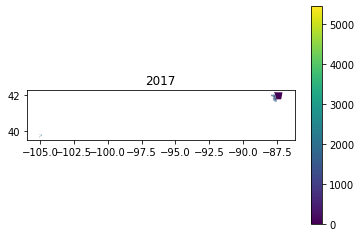

In [83]:
so.simple_map(chicago_int.drop_duplicates(subset='tract',keep='first'),  "Estimate!!Total: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD", 
                  'tract', '2017', f"/tmp/visualizations/chicago-acs-internet-tract-2017.png")

In [23]:
GOOD_CITY_SHAPEFILE_LOCATIONS = {
    "seattle": { "location" : "/tmp/neighborhood-data/seattle/seattle_ccn/City_Clerk_Neighborhoods.shp", "nhood_col" : 'HOODS_'},
    "denver": {"location": "/tmp/neighborhood-data/denver/denver_1.0.32/statistical_neighborhoods.shp", "nhood_col": "NBHD_NAME"},
    "washington-dc": {"location": "/tmp/neighborhood-data/washington-dc/DC_shapefile/Neighborhood_Clusters.shp", "nhood_col": "NAME"},
    "boston": {"location": "/tmp/neighborhood-data/boston/Boston_Neighborhoods/Boston_Neighborhoods.shp", "nhood_col": "Name"},
     "portland": {"location": "/tmp/neighborhood-data/portland/portland-neighborhood-boundaries/Neighborhood_Boundaries.shp", "nhood_col": "ID"},
    "houston": {"location": "/tmp/neighborhood-data/houston/Houston/Houston.shp", "nhood_col": "SNBNAME"},
    "indianapolis": { "location": "/tmp/neighborhood-data/indianapolis/Indy_Neighborhoods/Indy_Neighborhoods.shp", "nhood_col": "NAME"},
    "los-angeles": {"location": "/tmp/neighborhood-data/los-angeles/Los Angeles/Los Angeles.shp", "nhood_col": "display_na"},
    "phoenix": {"location": "/tmp/neighborhood-data/phoenix/phoenix/Villages.shp", "nhood_col": "NAME"},
    "san-francisco": { "location": "/tmp/neighborhood-data/san-francisco/SF Find Neighborhoods/geo_export_f62da660-837f-478c-9ba4-ceb40e9ed8eb.shp", "nhood_col": "name"},
    "austin": {"location": "/tmp/neighborhood-data/austin/Neighborhoods/geo_export_81d98617-c469-49e1-9bf6-3ef25c07d0c6.shp", "nhood_col": "neighname"},
    "dallas": { "location": "/tmp/neighborhood-data/dallas/Councils/Councils.shp", "nhood_col": "COUNCIL"},
    "san-jose": { "location": "/tmp/neighborhood-data/san-jose/Zip_Code_Boundary/Zip_Code_Boundary.shp","nhood_col": "ZIPCODE"},
    "san-diego": {"location": "/tmp/neighborhood-data/san-diego/CommunityPlanningAreas/cmty_plan_datasd.shp","nhood_col": "cpname"},
    "baltimore": {"location": "/tmp/neighborhood-data/baltimore/neighborhoods/baltimore.shp","nhood_col": "Name"},
    "detroit": {"location": "/tmp/neighborhood-data/detroit/neighborhoods/detroit.shp", "nhood_col": "name"},
    "louisville": {"location": "/tmp/neighborhood-data/louisville/neighborhoods/louisville.shp", "nhood_col": "NH_NAME"},
    "new-york-city": {"location": "/tmp/neighborhood-data/new-york-city/nycd_22a/nycd.shp", "nhood_col": "BoroCD"},
    "chicago": {"location": "/tmp/neighborhood-data/chicago/neighborhoods/geo_export_24517513-d42b-43b9-a525-49bfe729d213.shp", "nhood_col": "pri_neigh" }
    }

In [25]:
chi_nhood = geopandas.read_file(GOOD_CITY_SHAPEFILE_LOCATIONS['chicago']['location'])

In [42]:
city_nhood = chi_nhood.rename({GOOD_CITY_SHAPEFILE_LOCATIONS['chicago']['nhood_col']: 'Neighborhood'}, axis='columns')

In [43]:
city_nhood

,Neighborhood,sec_neigh,shape_area,shape_len,geometry
0,Grand Boulevard,BRONZEVILLE,4.849250e+07,28196.837157,"POLYGON ((-87.60671 41.81681, -87.60670 41.816..."
1,Printers Row,PRINTERS ROW,2.162138e+06,6864.247156,"POLYGON ((-87.62761 41.87437, -87.62760 41.873..."
2,United Center,UNITED CENTER,3.252051e+07,23101.363745,"POLYGON ((-87.66707 41.88885, -87.66707 41.888..."
3,Sheffield & DePaul,SHEFFIELD & DEPAUL,1.048259e+07,13227.049745,"POLYGON ((-87.65833 41.92166, -87.65835 41.922..."
4,Humboldt Park,HUMBOLDT PARK,1.250104e+08,46126.751351,"POLYGON ((-87.74060 41.88782, -87.74060 41.887..."
...,...,...,...,...,...
93,Belmont Cragin,"BELMONT CRAGIN,HERMOSA",1.090994e+08,43311.706886,"POLYGON ((-87.74143 41.91698, -87.74141 41.916..."
94,Austin,AUSTIN,1.700378e+08,55473.345911,"POLYGON ((-87.75620 41.91547, -87.75588 41.915..."
95,Gold Coast,GOLD COAST,7.165706e+06,13685.479377,"POLYGON ((-87.62646 41.91147, -87.62640 41.911..."
96,Boystown,BOYSTOWN,3.365779e+06,9780.268985,"POLYGON ((-87.64878 41.93999, -87.64927 41.939..."


In [27]:
merged_df = geopandas.sjoin(chicago, chi_nhood, how="inner", op='intersects')

In [32]:
merged_df.drop_duplicates(subset='tract', keep='first')

,City,tract,state,county,STATEFP,COUNTYFP,Estimate!!Total: TOTAL POPULATION,PERC Estimate!!Total:!!Female: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,PERC Estimate!!Total:!!Male: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,PERC Estimate!!Total: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,...,Estimate!!Total:!!Female: PRIVATE HEALTH INSURANCE STATUS BY SEX BY AGE,Estimate!!Total: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,Estimate!!Total:!!Male: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,Estimate!!Total:!!Female: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,geometry,index_right,pri_neigh,sec_neigh,shape_area,shape_len
240,chicago,221000,32.500000,116.000000,17,031,3242.000000,0.528532,0.471468,1.000000,...,1713.500000,3242.000000,1528.500000,1713.500000,"POLYGON ((-87.71699 41.92460, -87.71675 41.924...",13,Logan Square,LOGAN SQUARE,7.125681e+07,36361.508518
241,chicago,221100,29.000000,85.000000,17,031,4918.500000,0.500559,0.488767,0.989326,...,2462.000000,4866.000000,2404.000000,2462.000000,"POLYGON ((-87.71374 41.92464, -87.71366 41.924...",13,Logan Square,LOGAN SQUARE,7.125681e+07,36361.508518
258,chicago,831200,17.000000,31.000000,17,031,4855.000000,0.483831,0.516169,1.000000,...,2349.000000,4855.000000,2506.000000,2349.000000,"POLYGON ((-87.74142 41.91698, -87.74138 41.916...",13,Logan Square,LOGAN SQUARE,7.125681e+07,36361.508518
266,chicago,832400,21.500000,73.000000,17,031,3845.500000,0.518918,0.473931,0.992849,...,1995.500000,3818.000000,1822.500000,1995.500000,"POLYGON ((-87.69720 41.91749, -87.69696 41.917...",13,Logan Square,LOGAN SQUARE,7.125681e+07,36361.508518
372,chicago,200402,17.000000,31.000000,17,031,5179.000000,0.506468,0.493532,1.000000,...,2623.000000,5179.000000,2556.000000,2623.000000,"POLYGON ((-87.73395 41.91891, -87.73371 41.918...",13,Logan Square,LOGAN SQUARE,7.125681e+07,36361.508518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,chicago,740200,28.000000,130.600000,17,031,4100.800000,0.515217,0.473956,0.989173,...,2112.800000,4056.400000,1943.600000,2112.800000,"POLYGON ((-87.72113 41.71317, -87.72088 41.713...",22,Mount Greenwood,"MOUNT GREENWOOD,MORGAN PARK",7.558429e+07,48665.130539
744,chicago,740300,30.333333,201.666667,17,031,2919.666667,0.476196,0.523804,1.000000,...,1390.333333,2919.666667,1529.333333,1390.333333,"POLYGON ((-87.72064 41.69857, -87.72043 41.698...",22,Mount Greenwood,"MOUNT GREENWOOD,MORGAN PARK",7.558429e+07,48665.130539
745,chicago,740400,29.666667,171.666667,17,031,5284.666667,0.339283,0.304844,0.644128,...,1793.000000,3404.000000,1611.000000,1793.000000,"POLYGON ((-87.73973 41.69089, -87.73949 41.690...",22,Mount Greenwood,"MOUNT GREENWOOD,MORGAN PARK",7.558429e+07,48665.130539
862,chicago,823200,17.000000,31.000000,17,031,4753.000000,0.512729,0.487271,1.000000,...,2437.000000,4753.000000,2316.000000,2437.000000,"POLYGON ((-87.77857 41.68297, -87.77749 41.682...",22,Mount Greenwood,"MOUNT GREENWOOD,MORGAN PARK",7.558429e+07,48665.130539


In [37]:
pd.NA

<NA>